In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('arXiv_scientific dataset.csv')

In [3]:
df.head()

,id,title,category,category_code,published_date,updated_date,authors,first_author,summary,summary_word_count
0,cs-9308101v1,Dynamic Backtracking,Artificial Intelligence,cs.AI,8/1/93,8/1/93,['M. L. Ginsberg'],'M. L. Ginsberg',Because of their occasional need to return to ...,79
1,cs-9308102v1,A Market-Oriented Programming Environment and ...,Artificial Intelligence,cs.AI,8/1/93,8/1/93,['M. P. Wellman'],'M. P. Wellman',Market price systems constitute a well-underst...,119
2,cs-9309101v1,An Empirical Analysis of Search in GSAT,Artificial Intelligence,cs.AI,9/1/93,9/1/93,"['I. P. Gent', 'T. Walsh']",'I. P. Gent',We describe an extensive study of search in GS...,167
3,cs-9311101v1,The Difficulties of Learning Logic Programs wi...,Artificial Intelligence,cs.AI,11/1/93,11/1/93,"['F. Bergadano', 'D. Gunetti', 'U. Trinchero']",'F. Bergadano',As real logic programmers normally use cut (!)...,174
4,cs-9311102v1,Software Agents: Completing Patterns and Const...,Artificial Intelligence,cs.AI,11/1/93,11/1/93,"['J. C. Schlimmer', 'L. A. Hermens']",'J. C. Schlimmer',To support the goal of allowing users to recor...,187


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136238 entries, 0 to 136237
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  136238 non-null  object
 1   title               136238 non-null  object
 2   category            136238 non-null  object
 3   category_code       136238 non-null  object
 4   published_date      136238 non-null  object
 5   updated_date        136238 non-null  object
 6   authors             136238 non-null  object
 7   first_author        136238 non-null  object
 8   summary             136238 non-null  object
 9   summary_word_count  136238 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 10.4+ MB


In [6]:
df.describe()

,summary_word_count
count,136238.000000
mean,162.386830
std,49.374474
min,1.000000
25%,128.000000
50%,160.000000
75%,195.000000
max,552.000000


In [7]:
df.isnull().sum()

id                    0
title                 0
category              0
category_code         0
published_date        0
updated_date          0
authors               0
first_author          0
summary               0
summary_word_count    0
dtype: int64

In [8]:
# Convert date columns to datetime format
df["published_date"] = pd.to_datetime(df["published_date"], errors="coerce")
df["updated_date"] = pd.to_datetime(df["updated_date"], errors="coerce")

# Convert 'authors' column from string to list
import ast

df["authors"] = df["authors"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Clean 'first_author' by removing extra quotes
df["first_author"] = df["first_author"].str.replace("'", "").str.strip()

In [9]:
df.dtypes

id                            object
title                         object
category                      object
category_code                 object
published_date        datetime64[ns]
updated_date          datetime64[ns]
authors                       object
first_author                  object
summary                       object
summary_word_count             int64
dtype: object

In [10]:
df.head()

,id,title,category,category_code,published_date,updated_date,authors,first_author,summary,summary_word_count
0,cs-9308101v1,Dynamic Backtracking,Artificial Intelligence,cs.AI,1993-08-01,1993-08-01,[M. L. Ginsberg],M. L. Ginsberg,Because of their occasional need to return to ...,79
1,cs-9308102v1,A Market-Oriented Programming Environment and ...,Artificial Intelligence,cs.AI,1993-08-01,1993-08-01,[M. P. Wellman],M. P. Wellman,Market price systems constitute a well-underst...,119
2,cs-9309101v1,An Empirical Analysis of Search in GSAT,Artificial Intelligence,cs.AI,1993-09-01,1993-09-01,"[I. P. Gent, T. Walsh]",I. P. Gent,We describe an extensive study of search in GS...,167
3,cs-9311101v1,The Difficulties of Learning Logic Programs wi...,Artificial Intelligence,cs.AI,1993-11-01,1993-11-01,"[F. Bergadano, D. Gunetti, U. Trinchero]",F. Bergadano,As real logic programmers normally use cut (!)...,174
4,cs-9311102v1,Software Agents: Completing Patterns and Const...,Artificial Intelligence,cs.AI,1993-11-01,1993-11-01,"[J. C. Schlimmer, L. A. Hermens]",J. C. Schlimmer,To support the goal of allowing users to recor...,187


In [11]:
# 1. Publication Trends (Yearly Paper Count)
df["published_year"] = df["published_date"].dt.year
yearly_counts = df["published_year"].value_counts().sort_index()

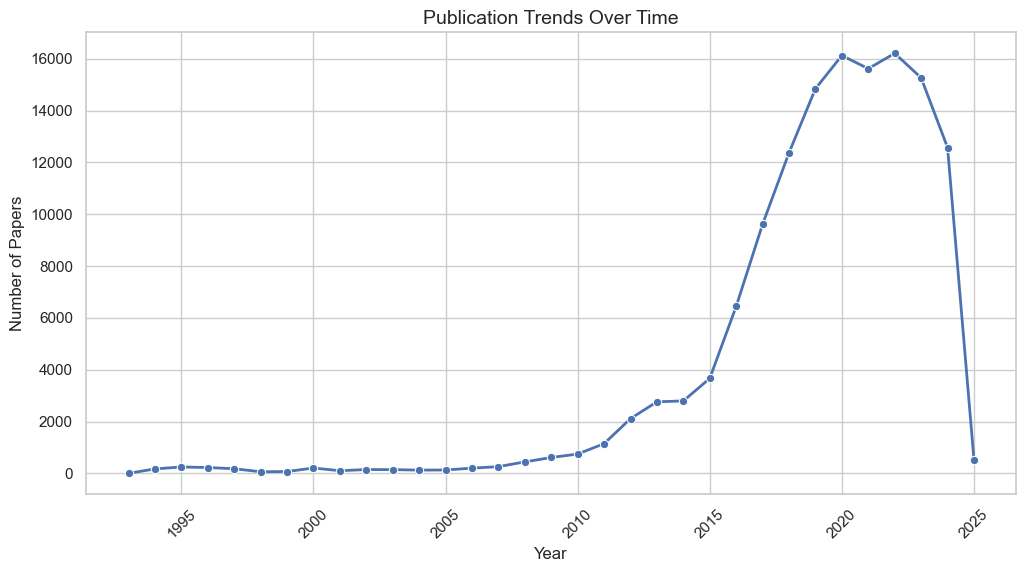

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker="o", linewidth=2)
plt.title("Publication Trends Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Papers", fontsize=12)
plt.xticks(rotation=45)
plt.show()

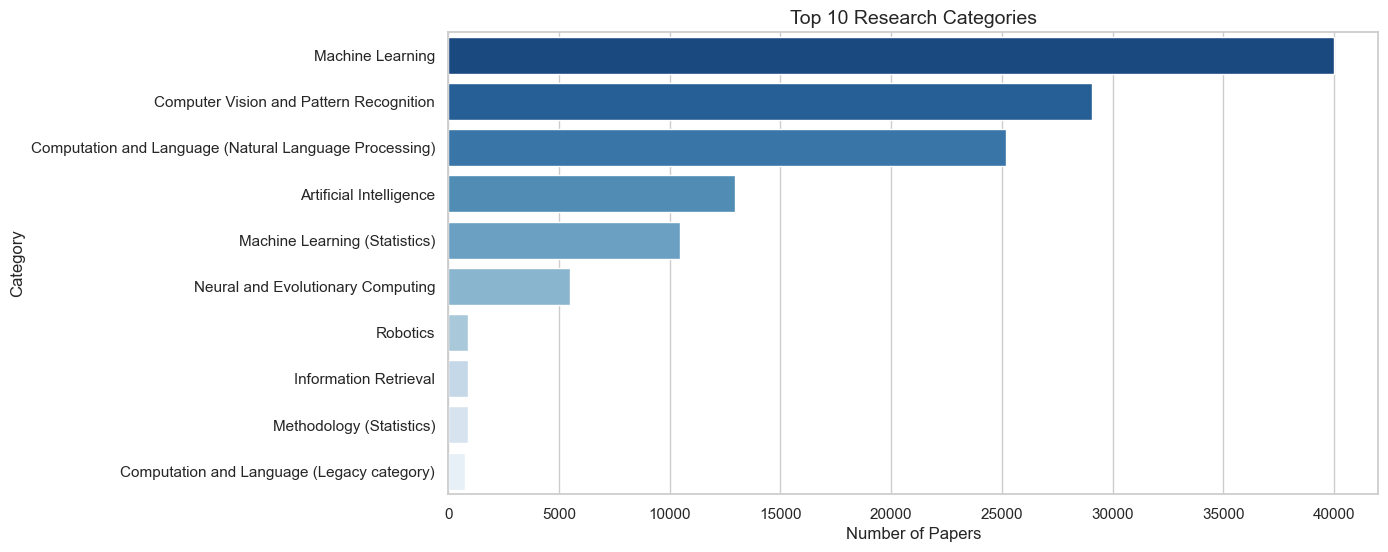

In [13]:
# 2. Most Common Research Categories
plt.figure(figsize=(12, 6))
top_categories = df["category"].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette="Blues_r")
plt.title("Top 10 Research Categories", fontsize=14)
plt.xlabel("Number of Papers", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.show()

In [14]:
# 3. Most Prolific Authors (Top 10)
from collections import Counter

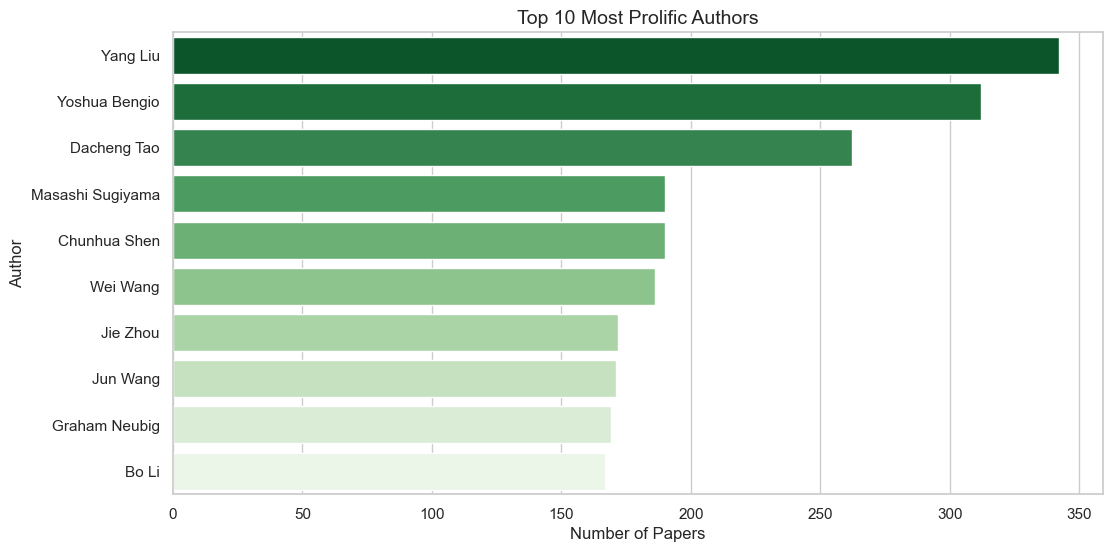

In [15]:
all_authors = [author for sublist in df["authors"] for author in sublist]
top_authors = Counter(all_authors).most_common(10)

authors, counts = zip(*top_authors)
plt.figure(figsize=(12, 6))
sns.barplot(x=counts, y=authors, palette="Greens_r")
plt.title("Top 10 Most Prolific Authors", fontsize=14)
plt.xlabel("Number of Papers", fontsize=12)
plt.ylabel("Author", fontsize=12)
plt.show()

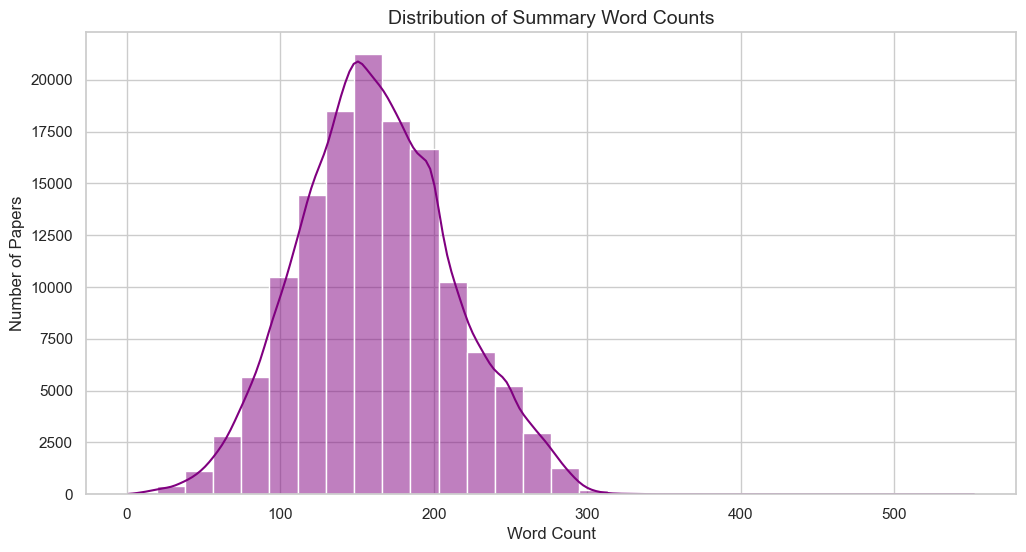

In [16]:
# 4. Summary Length Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df["summary_word_count"], bins=30, kde=True, color="purple")
plt.title("Distribution of Summary Word Counts", fontsize=14)
plt.xlabel("Word Count", fontsize=12)
plt.ylabel("Number of Papers", fontsize=12)
plt.show()

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import numpy as np

In [19]:
# 1. Growth of Research Fields Over Time (Top 5 categories over the years)
top_categories = df["category"].value_counts().head(5).index.tolist()
df_top_categories = df[df["category"].isin(top_categories)]

category_trends = df_top_categories.groupby(["published_year", "category"]).size().unstack().fillna(0)

<Figure size 1200x600 with 0 Axes>

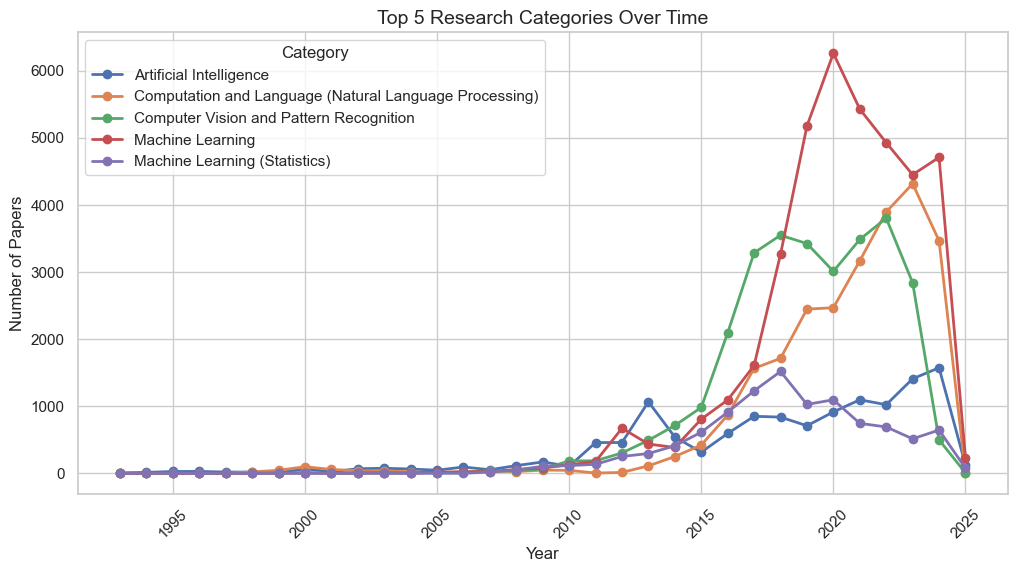

In [20]:
# Plot category trends over time
plt.figure(figsize=(12, 6))
category_trends.plot(marker="o", linewidth=2, figsize=(12, 6))
plt.title("Top 5 Research Categories Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Papers", fontsize=12)
plt.legend(title="Category")
plt.xticks(rotation=45)
plt.show()

In [21]:
# 2. Trending Topics Based on Keywords (Extracting top words from paper titles)
vectorizer = CountVectorizer(stop_words="english", max_features=50)
title_matrix = vectorizer.fit_transform(df["title"])
title_word_counts = np.array(title_matrix.sum(axis=0)).flatten()
title_vocab = vectorizer.get_feature_names_out()

In [22]:
top_words_title = dict(sorted(zip(title_vocab, title_word_counts), key=lambda x: x[1], reverse=True)[:15])

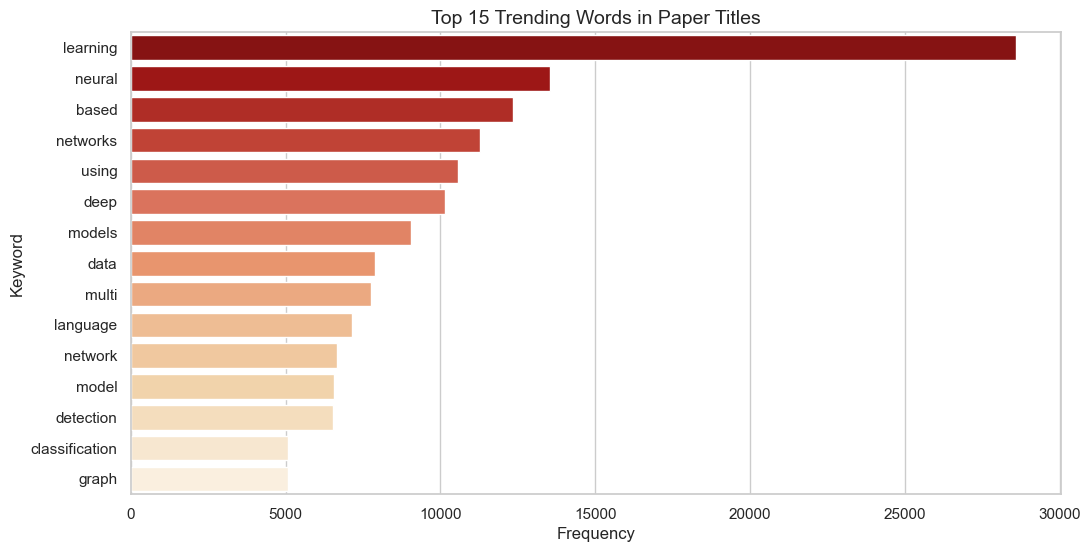

In [23]:
# Plot top words in titles
plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_words_title.values()), y=list(top_words_title.keys()), palette="OrRd_r")
plt.title("Top 15 Trending Words in Paper Titles", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Keyword", fontsize=12)
plt.show()

In [25]:
pip install nltk

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------- ----- 1.3/1.5 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 6.6 MB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk


In [27]:
nltk.download("vader_lexicon")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...


True

In [28]:
# Function to clean text
def preprocess_text(text):
    if isinstance(text, str):
        return text.lower()
    return ""

df["title"] = df["title"].apply(preprocess_text)
df["summary"] = df["summary"].apply(preprocess_text)

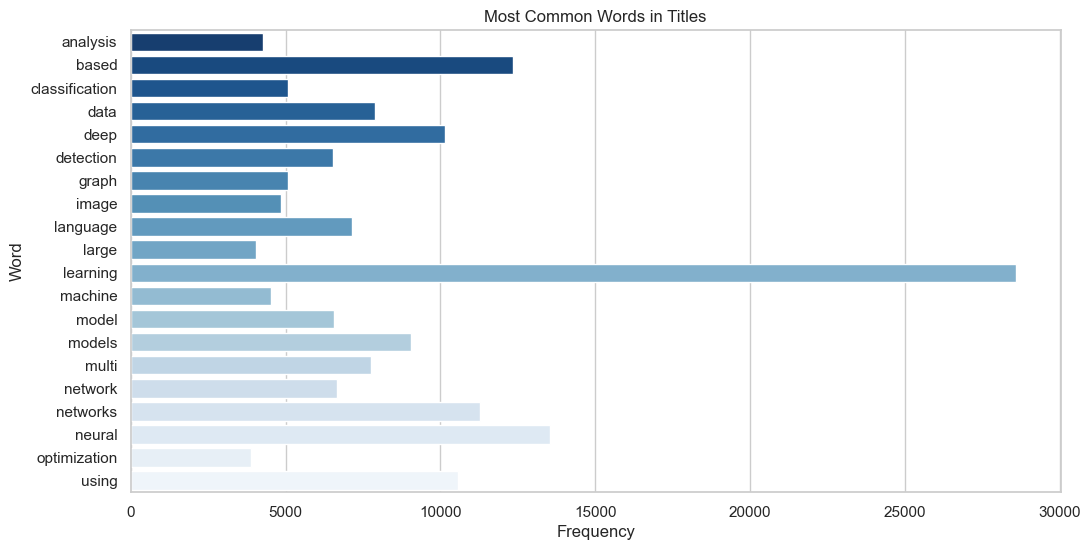

In [29]:
# 1. Most Common Words in Titles
vectorizer = CountVectorizer(stop_words="english", max_features=20)
title_matrix = vectorizer.fit_transform(df["title"])
title_words = dict(zip(vectorizer.get_feature_names_out(), title_matrix.sum(axis=0).A1))

plt.figure(figsize=(12, 6))
sns.barplot(x=list(title_words.values()), y=list(title_words.keys()), palette="Blues_r")
plt.title("Most Common Words in Titles")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

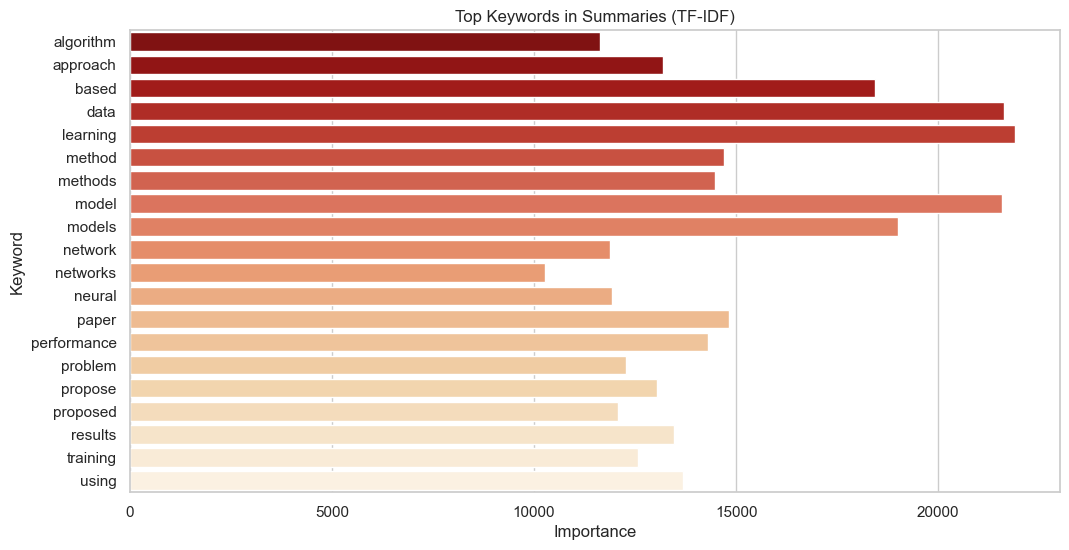

In [30]:
# 2. Keyword Extraction with TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=20)
tfidf_matrix = tfidf_vectorizer.fit_transform(df["summary"])
tfidf_words = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_matrix.sum(axis=0).A1))

plt.figure(figsize=(12, 6))
sns.barplot(x=list(tfidf_words.values()), y=list(tfidf_words.keys()), palette="OrRd_r")
plt.title("Top Keywords in Summaries (TF-IDF)")
plt.xlabel("Importance")
plt.ylabel("Keyword")
plt.show()

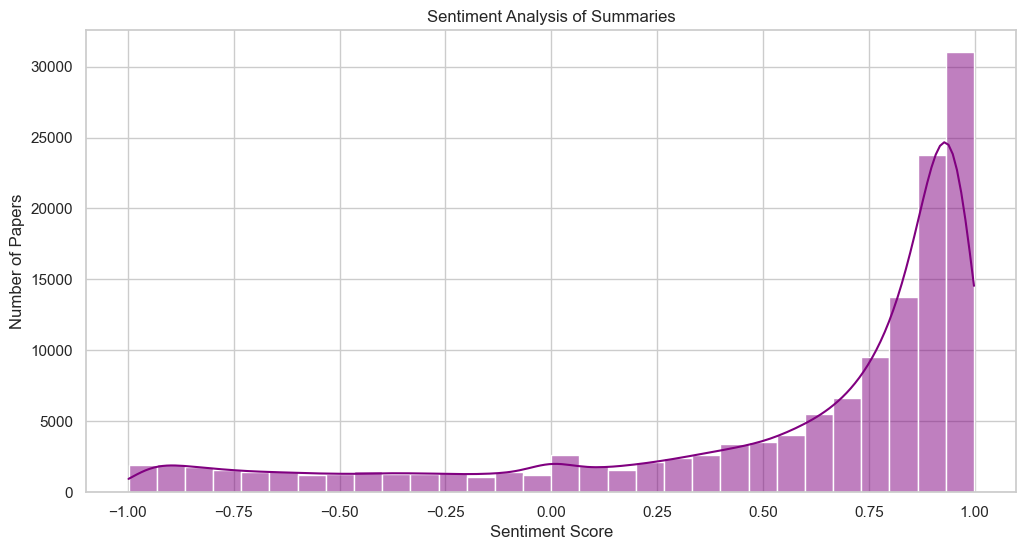

Text analysis complete!


In [32]:
# 3. Sentiment Analysis of Summaries
sia = SentimentIntensityAnalyzer()
df["sentiment"] = df["summary"].apply(lambda x: sia.polarity_scores(x)["compound"])

plt.figure(figsize=(12, 6))
sns.histplot(df["sentiment"], bins=30, kde=True, color="purple")
plt.title("Sentiment Analysis of Summaries")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Papers")
plt.show()
print("Text analysis complete!")

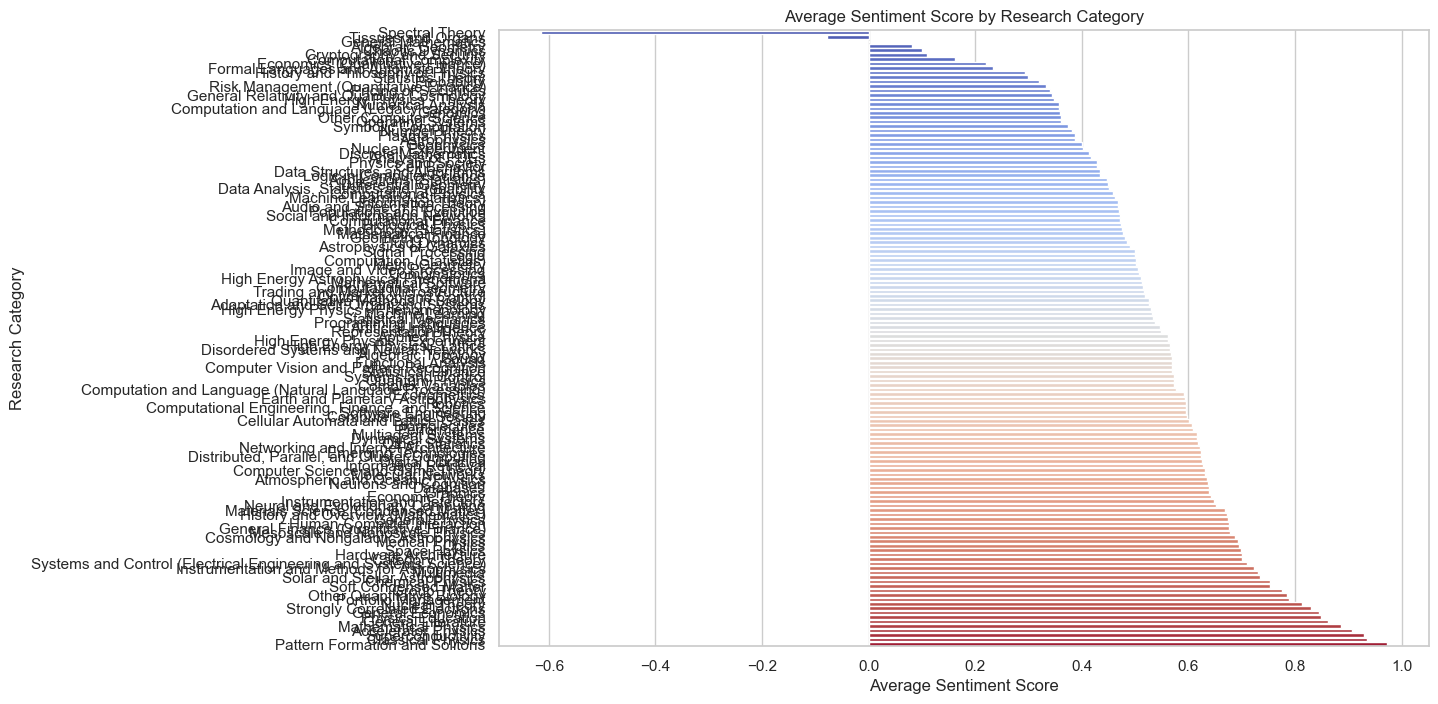

In [33]:
category_sentiment = df.groupby("category")["sentiment"].mean().sort_values()

plt.figure(figsize=(12, 8))
sns.barplot(x=category_sentiment.values, y=category_sentiment.index, palette="coolwarm")
plt.title("Average Sentiment Score by Research Category")
plt.xlabel("Average Sentiment Score")
plt.ylabel("Research Category")
plt.show()

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

In [42]:
# Topic Modeling with LDA
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_matrix = lda.fit_transform(tfidf_matrix)

In [43]:
def get_topic_keywords(model, vectorizer, top_n=10):
    keywords = []
    for topic_idx, topic in enumerate(model.components_):
        keywords.append([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-top_n:]])
    return keywords

topic_keywords = get_topic_keywords(lda, tfidf_vectorizer)
for i, keywords in enumerate(topic_keywords):
    print(f"Topic {i+1}: {', '.join(keywords)}")


Topic 1: network, traffic, models, temporal, forecasting, model, prediction, series, data, time
Topic 2: deep, neural, systems, research, model, machine, models, ai, learning, data
Topic 3: information, paper, words, semantic, based, model, logic, knowledge, word, language
Topic 4: based, method, network, detection, video, segmentation, object, 3d, images, image
Topic 5: learning, adversarial, bayesian, distribution, inference, neural, networks, models, model, data
Topic 6: linear, problem, method, learning, kernel, clustering, matrix, algorithm, graph, data
Topic 7: gradient, agent, algorithms, reward, regret, reinforcement, rl, algorithm, learning, policy
Topic 8: knowledge, languages, tasks, translation, task, llms, model, text, models, language
Topic 9: network, classification, performance, supervised, model, image, domain, data, training, learning
Topic 10: evolutionary, agent, learning, agents, algorithms, problem, problems, algorithm, optimization, search


In [44]:
# Content-Based Recommendation Using LDA Similarity
def recommend_papers_lda(paper_index, top_n=5):
    paper_topic_dist = lda_matrix[paper_index]
    similarities = np.dot(lda_matrix, paper_topic_dist)
    top_indices = similarities.argsort()[-(top_n + 1):-1][::-1]
    return df.iloc[top_indices][["title", "summary"]]

In [46]:
# Example: Recommend similar papers to the first paper in the dataset
recommended_papers_lda = recommend_papers_lda(0, top_n=5)
print("Recommended Papers Based on LDA:")

Recommended Papers Based on LDA:


In [47]:
print(recommended_papers_lda)

                                                  title  \
902   an improved search algorithm for optimal multi...   
6713  route planning for last-mile deliveries using ...   
782   taming numbers and durations in the model chec...   
5854  planning spatial networks with monte carlo tre...   
8200   structural design through reinforcement learning   

                                                summary  
902   multiple sequence alignment (msa) is a ubiquit...  
6713  mobile parcel lockers have been recently propo...  
782   the model checking integrated planning system ...  
5854  we tackle the problem of goal-directed graph c...  
8200  this paper introduces the structural optimizat...  
